<a href="https://colab.research.google.com/github/talitmr/Classification_CNN_Cat_or_Dog/blob/main/Classification_with_CNN_cat_or_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Layer with Numpy

In [ ]:
import numpy as np
import torch

In [ ]:
# input shape: [batch size, input_channels, input_height, input_width]
sample_input  = np.random.random([5, 3, 24, 24]) 

# kernel shape: [output_channels, input_channels, filter_height, filter width]
sample_kernel = np.random.random([16, 3, 5, 5])

In [ ]:
def torch_convolution(input_numpy, kernel_numpy):
    '''
    This function;
    1) Takes numpy arrays as input and kernel,
    2) Converts them to tensors, 
    3) Applies torch.conv2d,
    4) Converts the output back to numpy array
    5) Returns the output numpy array
    
    '''
    input_torch, kernel_torch = torch.Tensor(input_numpy), torch.Tensor(kernel_numpy)
    output_torch = torch.conv2d(input_torch, kernel_torch)
    
    output = output_torch.numpy()
    return output


In [ ]:
def my_convolution(input_numpy, kernel_numpy):
    '''
    In this function, you are required to implement the 3rd step of the function above without using torch.
    You are free to use "for" loops or vectorized code.
    '''
    input_torch, kernel_torch = torch.Tensor(input_numpy), torch.Tensor(kernel_numpy)
    # stride = 1 according to output size. (24-5+1 = 20)
    # required output size is not equal to 24. So padding is not necessary
    stride, pad = 1,0

    # bs = batch size, ic = # of input channels, ih = input height, iw = input width
    bs, ic, ih, iw = input_numpy.shape

    # koc = kernel output channels, kic = kernel input channels, kh = kernel height, kw = kernel width
    koc, kic, kh, kw = kernel_numpy.shape

    # output size, oc = output channels, oh = output height, ow = output width
    oc, oh, ow = koc, int((ih + 2*pad - kh)/ stride) +1, int((iw + 2*pad - kw)/ stride) +1

    output = np.zeros((bs,oc,oh,ow))
    
    central = int(kh/2)   # to find center of kernel

    # applying kernel to input
    for b in range(bs):        # for every image
       
       for c in range(oc):     # for every channel

         for h in range(oh):   # channels heigth cells
           hi = h * stride 
           hf = hi + kh

           for w in range(ow): # channels width cells
             wi = w*stride
             wf = wi + kh
             
             # calculating output indicies
             output[b,c,h,w] = np.sum(input_numpy[b,:,h*stride:h*stride+kh, w*stride:w*stride+kh] * kernel_numpy[c,:,:,:] )

    return output

In [ ]:
# output_shape: [batch_size, output_channels, output_height, output_width]
torch_output = torch_convolution(sample_input, sample_kernel)
my_output    = my_convolution(sample_input, sample_kernel)


# Output shapes of torch implementation and your implementation need to match.
print(f'Torch implementation output shape: {torch_output.shape}')
print(f'Your implementation output shape: {my_output.shape}')

# You may also expect exactly equal outputs if your implementation is correct. However due to finite
# precision floating point arithmetic, results will never be exactly equal, but really close instead. 


# Convolutional Neural Networks

## Imports

In [ ]:
import torch, torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Helper for visualization
def torch_imshow(img):
    img = img.permute(1,2,0)
    plt.imshow(img.cpu().numpy())
    plt.show()

# Prepare Datasets



In [ ]:
## Note: If you are using Google Colab, upload the uncompressed dataset
# to your Google Drive and uncomment the lines below to mount your Google Drive here.

from google.colab import drive
drive.mount("/content/gdrive")

# After mounting the drive, your Google Drive contents
# will be in path: "/content/gdrive/MyDrive/"
# You can use the shell commands like "ls, cd" to navigate and peek into directories.
# Shell commands are used with "!" in the notebook.
### e.g: !ls '/content/gdrive'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

#enter the path to "cats_dogs" directory
dataset_path = "/content/gdrive/MyDrive/cats_dogs" 


training_set_path = os.path.join(dataset_path, 'training_set')
validation_set_path = os.path.join(dataset_path, 'validation_set')
test_set_path = os.path.join(dataset_path, 'test_set')

print(training_set_path)
print(validation_set_path)
print(test_set_path)

/content/gdrive/MyDrive/cats_dogs/training_set
/content/gdrive/MyDrive/cats_dogs/validation_set
/content/gdrive/MyDrive/cats_dogs/test_set


## a) Prepare Training Dataset


In [ ]:
#------------- (Training dataset transforms)---------------------------------#
# 1) Use random horizontal flip with probability 0.5 as data augmentation
# 2) Resize image to 100 x 100
# 3) Convert image to torch tensor.
#----------------------------------------------------------------------------#



training_transforms = torchvision.transforms.Compose([
                                                      torchvision.transforms.RandomHorizontalFlip(p=0.5),
                                                      torchvision.transforms.Resize(size=(100, 100)),
                                                      torchvision.transforms.ToTensor()


])
# creating training dataset using root
training_dataset = torchvision.datasets.ImageFolder(root= training_set_path, 
                                                    transform=training_transforms)




## b) Prepare Validation Dataset


In [ ]:
#------------- (Validation dataset transforms)--------------------------------#
# 1) Resize image to 100 x 100
# 2) Convert image to torch tensor.
#----------------------------------------------------------------------------#

validation_transforms = torchvision.transforms.Compose([
                                                        torchvision.transforms.RandomHorizontalFlip(p=0.5),
                                                        torchvision.transforms.Resize(size=(100, 100)),
                                                        torchvision.transforms.ToTensor()

])
# creating validation dataset using root
validation_dataset = torchvision.datasets.ImageFolder(root=validation_set_path, 
                                                      transform=validation_transforms)




## c) Prepare Test Dataset


In [ ]:
#------------- (Test dataset transforms)-------------------------------------#
# 1) Resize image to 100 x 100
# 2) Convert image to torch tensor.
#----------------------------------------------------------------------------#


test_transforms = torchvision.transforms.Compose([
                                                  torchvision.transforms.RandomHorizontalFlip(p=0.5),
                                                  torchvision.transforms.Resize(size=(100, 100)),
                                                  torchvision.transforms.ToTensor()

])
# creating test dataset using root
test_dataset = torchvision.datasets.ImageFolder(root=test_set_path, 
                                                    transform=test_transforms)


## d) Visualize 1 data sample for each class in training set


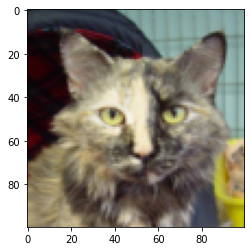

Label for cat: 0


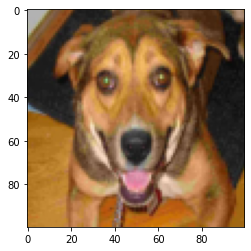

Label for dog: 1


In [ ]:
cat_img, cat_label = training_dataset[1]
torch_imshow(cat_img)
print(f'Label for cat: {cat_label}')

dog_img, dog_label = training_dataset[-1]
torch_imshow(dog_img)
print(f'Label for dog: {dog_label}')

# Prepare Dataloaders


In [ ]:
#-------------------------------------------------------------------------------------------------------------#
# -- Use batch size of 32 for all datasets
# -- Shuffle data only for training dataset
#-------------------------------------------------------------------------------------------------------------#
#
#
# Creating dataloader for each training, validation and test sets using batch 
# size 32 and shuffling only training
training_dataloader   = torch.utils.data.DataLoader(training_dataset, batch_size=32, shuffle=True) 
validation_dataloader = torch.utils.data.DataLoader(validation_dataset, batch_size=32, shuffle=False)
test_dataloader       = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)



# Create network


<img src="https://i.ibb.co/pXb6gHY/model.png" height="400" width="1000">

In [ ]:
# Define and initialize the model in the figure above
# -- Use stride = 1 for convolutional layers OK
# -- Use stride = 3 for max pooling layers OK
# -- Use 'relu' activation for hidden layers OK
# -- Use batch normalization after all convolutional layers 
# -- Use dropout with 0.1 probability for the hidden fully connected layer
# -- You are free to use softmax, log-softmax or no activation in the final layer
# -- However, you are going to need to choose a loss function accordingly.

#-------------------------------------------------------------------------------------------------------------#

class ConvNet(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # layer block 1  :
        #                  - convolution/ stride 1
        #                  - batch normalization
        #                  - pooling/ stride 3
        #                  - Relu at forward
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1)
        self.batchnorm1 = torch.nn.BatchNorm2d(num_features=16)
        self.maxpool1 = torch.nn.MaxPool2d(kernel_size=3, stride=3)
        
        # layer block 2  :
        #                  - convolution/ stride 1
        #                  - batch normalization
        #                  - pooling/ stride 3
        #                  - Relu at forward
        self.conv2 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1)
        self.batchnorm2 = torch.nn.BatchNorm2d(num_features=32)
        self.maxpool2 = torch.nn.MaxPool2d(kernel_size=3, stride=3)
        
        # layer block 3  :
        #                  - convolution/ stride 1
        #                  - batch normalization
        #                  - pooling/ stride 3
        #                  - Relu at forward
        self.conv3 = torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, stride=1)
        self.batchnorm3 = torch.nn.BatchNorm2d(num_features=32)
        self.maxpool3 = torch.nn.MaxPool2d(kernel_size=3, stride=3)
        
        # Flatten part  :
        #                  - Flatten layer
        #                  - Neural network
        #                  - Dropout regularization
        #                  - Neural Network
        self.flatten = torch.nn.Flatten()
        self.layer1 = torch.nn.Linear(32, 16)
        self.dropout = torch.nn.Dropout(p=0.1)
        self.layer2 = torch.nn.Linear(16, 2)



        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.batchnorm1(x)
        x = F.relu(x)
        
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.batchnorm2(x)
        x = F.relu(x)
        
        x = self.conv3(x)
        x = self.maxpool3(x)
        x = self.batchnorm3(x)
        x = F.relu(x)

        x = self.flatten(x)

        x = self.layer1(x)
        x = self.dropout(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = torch.sigmoid(x)
        
        return x
        

test_convnet = ConvNet().to('cuda')
test_input = torch.randn(16, 3, 100, 100, device='cuda')
test_output = test_convnet(test_input)
#print(sample_output.shape)
print(test_output.shape)

convNet = ConvNet().cuda()

torch.Size([16, 2])


# Define loss function


In [ ]:
# Define loss function to use here
#-------------------------------------------------------------------------------------------------------------#
# -- Note: Take the final activation of your neural network into account
#-------------------------------------------------------------------------------------------------------------#
#
# Loss function for Categorical dataset
loss_fn = torch.nn.CrossEntropyLoss() ## FILL HERE ## 

# Define optimizer


In [ ]:
# Define optimizer here
#-------------------------------------------------------------------------------------------------------------#
# -- Use Adam optimizer with default hyperparameters
#-------------------------------------------------------------------------------------------------------------#
#
# I choose Adam optimizer with learning rate 0.001
optimizer = torch.optim.Adam(params=convNet.parameters(), lr=0.002)## FILL HERE ##

# Define validation(test) loop

In [ ]:
# Define a function that takes a model and a dataloader and outputs model accuracy on the dataloader
# This function is to be used on both validation and test dataloader.
#-------------------------------------------------------------------------------------------------------------#
# -- Note: Don't forget to toggle eval mode on at the beginning of the function and toggle it off at the end.
# -- Note: When testing for accuracies, torch doesn't need to keep track of activations and gradients in the network. 
#      You may want to turn off gradients for test loop.
#-------------------------------------------------------------------------------------------------------------#
def check_accuracy(neuralnet, dataloader):
    
    ## Toggle eval mode on
    ##   https://stackoverflow.com/questions/60018578/what-does-model-eval-do-in-pytorch
    
    # starting eval mode
    neuralnet.eval() ## FILL HERE ##
    
    
    num_correct_predictions   = 0
    num_incorrect_predictions = 0
    
    for imgs_batch, labels_batch in dataloader:
        
        # Load batches to GPU
        imgs_batch, labels_batch = imgs_batch.to("cuda"), labels_batch.to("cuda")
        
        # Pass input images to the network
        # Obtain predictions from network output
        # Name the variable that holds predictions as `predictions_batch`
        # 'predictions_batch' needs to hold class predictions as 0 (cat) and 1 (dog) 
        
        
        class_scores = neuralnet(imgs_batch)    # getting neural network end class scores
        predictions_batch = torch.argmax(class_scores, dim = 1) # predictions
        ## FILL HERE ##
        
        
        
        
        num_correct_predictions_batch   = torch.sum(predictions_batch == labels_batch)
        num_incorrect_predictions_batch = torch.sum(predictions_batch != labels_batch)
        
        num_correct_predictions   += num_correct_predictions_batch.item()
        num_incorrect_predictions += num_incorrect_predictions_batch.item()
    
    accuracy = num_correct_predictions / (num_correct_predictions + num_incorrect_predictions)
    
    
    ## Toggle eval mode off to turn back to training mode
    neuralnet.train()## FILL HERE ##
    
    return accuracy    
    

## Test performance before training

In [ ]:
# Use the test function you defined above to test your network on test set before training
# Untrained network accuracy should be around 50%

test_accuracy = check_accuracy(convNet, test_dataloader)
print(f'Test accuracy before training: {test_accuracy * 100 :.2f}%')

Test accuracy before training: 50.00%


## Define training loop


In [ ]:
# Define a function that takes a model, a dataloader, an optimizer and a loss function and trains the model
#  on the dataloader for 1 epoch using optimizer and loss function. This function is not supposed to return anything.
#-------------------------------------------------------------------------------------------------------------#

def train_one_epoch(neuralnet, dataloader, optimizer, loss_fn):
    
    for imgs_batch, labels_batch in dataloader:
        imgs_batch, labels_batch = imgs_batch.to("cuda"), labels_batch.to("cuda")
        
        ## Pass inputs to the network
        ## Calculate loss using labels and network outputs
        ## Take a step with optimizer (don't forget `zero_grad` and `backward`!)
        
        optimizer.zero_grad() # setting the gradients to zero before starting to do backpropragation
        output = neuralnet(imgs_batch) # neural network results
        loss = loss_fn(output, labels_batch) # calculating loss function 

        loss.backward() # calculating gradients
        optimizer.step() # performs a parameter update based on the current gradient and update rule
        
        
        ## FILL HERE ##
        
        
        

## Train
Train the network for at least 10 epochs. Measure both training and validation accuracy after each epoch, show it on a epoch/accuracy graph.


In [ ]:
# Use the training function you defined above to train your network on training set.

training_accuracy_list = []
validation_accuracy_list = []

NUM_EPOCHS = 20 #at least 10

for epoch_no in range(NUM_EPOCHS):
    print(f'Epoch {epoch_no + 1}...')
    
    train_one_epoch(convNet, training_dataloader, optimizer, loss_fn)
    
    training_accuracy = check_accuracy(convNet, training_dataloader)
    print(f'Training   accuracy: {training_accuracy * 100 :.2f}%')
    validation_accuracy = check_accuracy(convNet, validation_dataloader)
    print(f'Validation accuracy: {validation_accuracy * 100 :.2f}%')
    
    training_accuracy_list.append(training_accuracy)
    validation_accuracy_list.append(validation_accuracy)  



Epoch 1...
Training   accuracy: 57.44%
Validation accuracy: 52.25%
Epoch 2...
Training   accuracy: 59.44%
Validation accuracy: 59.00%
Epoch 3...
Training   accuracy: 62.38%
Validation accuracy: 62.75%
Epoch 4...
Training   accuracy: 57.00%
Validation accuracy: 57.25%
Epoch 5...
Training   accuracy: 72.88%
Validation accuracy: 65.25%
Epoch 6...
Training   accuracy: 61.19%
Validation accuracy: 59.00%
Epoch 7...
Training   accuracy: 76.94%
Validation accuracy: 70.75%
Epoch 8...
Training   accuracy: 80.50%
Validation accuracy: 72.75%
Epoch 9...
Training   accuracy: 81.81%
Validation accuracy: 74.00%
Epoch 10...
Training   accuracy: 75.25%
Validation accuracy: 68.00%
Epoch 11...
Training   accuracy: 76.88%
Validation accuracy: 68.00%
Epoch 12...
Training   accuracy: 84.81%
Validation accuracy: 75.50%
Epoch 13...
Training   accuracy: 76.75%
Validation accuracy: 69.00%
Epoch 14...
Training   accuracy: 87.94%
Validation accuracy: 73.50%
Epoch 15...
Training   accuracy: 72.56%
Validation accura

## Plot

Text(0, 0.5, 'Accuracy')

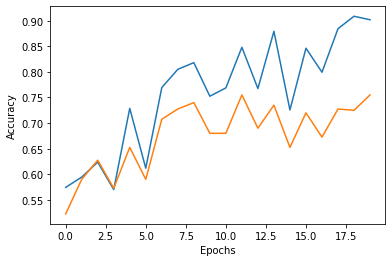

In [ ]:
plt.plot(training_accuracy_list)
plt.plot(validation_accuracy_list)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

## Test
Test the network on the test set


In [ ]:
# Use the test function you defined above to test your network before training
test_accuracy = check_accuracy(convNet, test_dataloader)
print(f'Test accuracy after training: {test_accuracy * 100 :.2f}%')

Test accuracy after training: 76.00%


## Save (optional)
If you managed to reach 70%+ accuracy in the test set, save the trained network to use in bonus (4th) question.


In [ ]:
# https://pytorch.org/tutorials/beginner/saving_loading_models.html
model_save_name = 'convNet.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(convNet, path)

In [ ]:
# If you are using Google Colab, check this article
# https://medium.com/@ml_kid/how-to-save-our-model-to-google-drive-and-reuse-it-2c1028058cb2